In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import joblib


# class LinearRegression:
#     def __init__(self, n_features: int): # initalize parameters
#         np.random.seed(10)
#         self.W = np.random.randn(n_features, 1) ## randomly initialise weight
#         self.b = np.random.randn(1) ## randomly initialise bias
        
#     def __call__(self, X): # how do we calculate output from an input in our model?
#         ypred = np.dot(X, self.W) + self.b
#         return ypred # return prediction
    
#     def update_params(self, W, b):
#         self.W = W ## set this instance's weights to the new weight value passed to the function
#         self.b = b ## do the same for the bias]

#     def plot_predictions(y_pred, y_true):
#         samples = len(y_pred)
#         plt.figure()
#         plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
#         plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
#         plt.legend()
#         plt.xlabel('Sample numbers')
#         plt.ylabel('Values')
#         plt.show()
    
#     def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
#         errors = y_pred - y_true  ## calculate errors
#         squared_errors = errors ** 2  ## square errors
#         return np.mean(squared_errors)
    
#     def minimize_loss(X_train, y_train):
#         X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
#         optimal_w = np.matmul(
#             np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
# #             np.matmul(X_with_bias.T, y_train),
#         )
        # return optimal_w[1:], optimal_w[0]


products = pd.read_pickle('cleaned_products.pkl')
products = products.dropna(subset='long')

                                        id       long       lat
1     243809c0-9cfc-4486-ad12-3b7a16605ba9  51.453489 -1.031873
2     1c58d3f9-8b93-47ea-9415-204fcc2a22e6  57.479012 -4.225739
3     860673f1-57f6-47ba-8d2f-13f9e05b8f9a  53.150228  0.329093
4     59948726-29be-4b35-ade5-bb2fd7331856  51.291949 -2.447623
5     16dbc860-696e-4cda-93f6-4dd4926573fb  53.568355 -2.026164
...                                    ...        ...       ...
7439  06d8a5c3-4f22-4d1b-ae7e-6ded471eb775  53.453547 -2.734323
7470  cce6d412-bac0-489e-9fba-cfdeeb756117  53.450693 -2.994883
7506  88d2d66b-2685-46b8-af84-f495fd2ccb14  53.450693 -2.994883
7675  8ca91ce8-49e7-4746-b06c-ac838d94ef35  53.485152 -2.898906
7913  df8ef910-03cc-4c9e-97a9-7f0a7e838102  51.272337 -0.721647

[6898 rows x 3 columns]


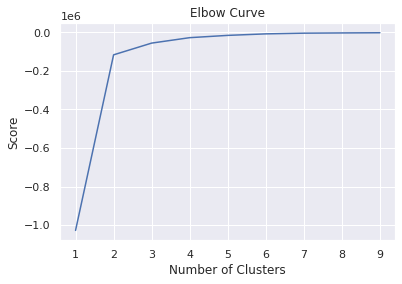

In [48]:
cluster_X = products.loc[:,['id', 'long', 'lat']]
print(cluster_X)

K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = products[['lat']]
X_axis = products[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

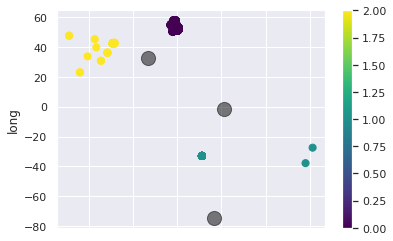

In [49]:
kmeans = KMeans(n_clusters = 3, init ='k-means++')
kmeans.fit(cluster_X[cluster_X.columns[1:3]]) # Compute k-means clustering.
cluster_X['cluster_long_lat'] = kmeans.fit_predict(cluster_X[cluster_X.columns[1:3]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(cluster_X[cluster_X.columns[1:3]]) # Labels of each point

cluster_X.plot.scatter(x = 'lat', y = 'long', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
cluster_X = cluster_X.drop(['long', 'lat'], axis=1)


In [63]:
products_clustered = products.merge(cluster_X, left_on='id', right_on='id')
products_clustered = products_clustered.drop(['long', 'lat'], axis=1)
products_clustered

,id,price_gbp,Baby & Kids Stuff,"Clothes, Footwear & Accessories",Computers & Software,DIY Tools & Materials,Health & Beauty,Home & Garden,"Music, Films, Books & Games",Office Furniture & Equipment,Other Goods,"Phones, Mobile Phones & Telecoms","Sports, Leisure & Travel",Video Games & Consoles,cluster_long_lat
0,243809c0-9cfc-4486-ad12-3b7a16605ba9,5.0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,20.0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,59948726-29be-4b35-ade5-bb2fd7331856,115.0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,16dbc860-696e-4cda-93f6-4dd4926573fb,450.0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6893,06d8a5c3-4f22-4d1b-ae7e-6ded471eb775,550.0,0,0,0,0,0,0,0,0,0,0,0,1,0
6894,cce6d412-bac0-489e-9fba-cfdeeb756117,69.0,0,0,0,0,0,0,0,0,0,0,0,1,0
6895,88d2d66b-2685-46b8-af84-f495fd2ccb14,380.0,0,0,0,0,0,0,0,0,0,0,0,1,0
6896,8ca91ce8-49e7-4746-b06c-ac838d94ef35,650.0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [64]:
products_clustered = products_clustered.drop(['id'], axis=1)
products_clustered

X = products.drop(['price_gbp'], axis=1)
y = products['price_gbp']
X

,id,long,lat,Baby & Kids Stuff,"Clothes, Footwear & Accessories",Computers & Software,DIY Tools & Materials,Health & Beauty,Home & Garden,"Music, Films, Books & Games",Office Furniture & Equipment,Other Goods,"Phones, Mobile Phones & Telecoms","Sports, Leisure & Travel",Video Games & Consoles
1,243809c0-9cfc-4486-ad12-3b7a16605ba9,51.453489,-1.031873,0,0,0,0,0,1,0,0,0,0,0,0
2,1c58d3f9-8b93-47ea-9415-204fcc2a22e6,57.479012,-4.225739,0,0,0,0,0,1,0,0,0,0,0,0
3,860673f1-57f6-47ba-8d2f-13f9e05b8f9a,53.150228,0.329093,0,0,0,0,0,1,0,0,0,0,0,0
4,59948726-29be-4b35-ade5-bb2fd7331856,51.291949,-2.447623,0,0,0,0,0,1,0,0,0,0,0,0
5,16dbc860-696e-4cda-93f6-4dd4926573fb,53.568355,-2.026164,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,06d8a5c3-4f22-4d1b-ae7e-6ded471eb775,53.453547,-2.734323,0,0,0,0,0,0,0,0,0,0,0,1
7470,cce6d412-bac0-489e-9fba-cfdeeb756117,53.450693,-2.994883,0,0,0,0,0,0,0,0,0,0,0,1
7506,88d2d66b-2685-46b8-af84-f495fd2ccb14,53.450693,-2.994883,0,0,0,0,0,0,0,0,0,0,0,1
7675,8ca91ce8-49e7-4746-b06c-ac838d94ef35,53.485152,-2.898906,0,0,0,0,0,0,0,0,0,0,0,1


In [72]:
products= products.drop(['id'], axis=1)
products

X = products.drop(['price_gbp'], axis=1)
y = products['price_gbp']
X

,long,lat,Baby & Kids Stuff,"Clothes, Footwear & Accessories",Computers & Software,DIY Tools & Materials,Health & Beauty,Home & Garden,"Music, Films, Books & Games",Office Furniture & Equipment,Other Goods,"Phones, Mobile Phones & Telecoms","Sports, Leisure & Travel",Video Games & Consoles
1,51.453489,-1.031873,0,0,0,0,0,1,0,0,0,0,0,0
2,57.479012,-4.225739,0,0,0,0,0,1,0,0,0,0,0,0
3,53.150228,0.329093,0,0,0,0,0,1,0,0,0,0,0,0
4,51.291949,-2.447623,0,0,0,0,0,1,0,0,0,0,0,0
5,53.568355,-2.026164,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,53.453547,-2.734323,0,0,0,0,0,0,0,0,0,0,0,1
7470,53.450693,-2.994883,0,0,0,0,0,0,0,0,0,0,0,1
7506,53.450693,-2.994883,0,0,0,0,0,0,0,0,0,0,0,1
7675,53.485152,-2.898906,0,0,0,0,0,0,0,0,0,0,0,1


      Actual    Predicted
3364   275.0   131.715913
3091    20.4   146.151612
6902   300.0  1461.047869
6930   550.0   948.134368
4276     5.0    50.591485


ValueError: x and y must be the same size

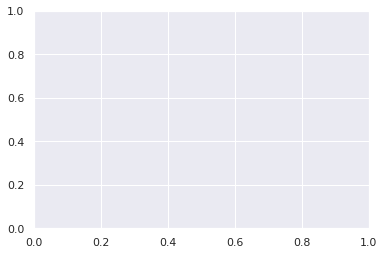

In [96]:
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVR_regression = SVR()
SVR_regression.fit(X_train, y_train)
y_pred = SVR_regression.predict(X_test)
# lin_regression = LinearRegression()
# lin_regression.fit(X_train, y_train)
# y_pred = lin_regression.predict(X_test)
# Lasso_regression = Lasso(alpha=0.1)
# Lasso_regression.fit(X_train, y_train)
# y_pred = Lasso_regression.predict(X_test)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df.head())
rmse = metrics.mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# # score = 
# print(rmse)
# print(r2)
# print(X.size())
# print(y.size)
# accuracy_score(y_test, y_pred)
plt.scatter(X_test, y_test, color ='b')
plt.plot(X_test, y_pred, color ='k')
  
plt.show()

# save model weights
# joblib.dump(lin_regression, "linear_regression.joblib")